# A Candy Necklace
An example of an exotic assembly of plaster colors.

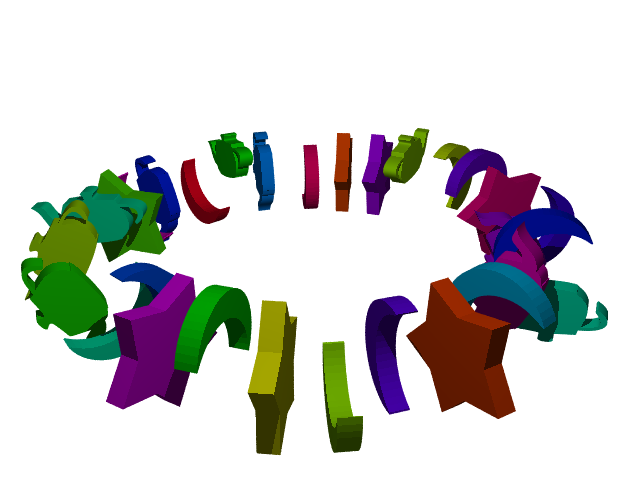

In [4]:
from ambrosia import *
from math import sin,cos
from random import random

# random number selection
def rand(low,high):
  range = high-low
  return low + range*random()

# construction of plaster materials of specific hues
def plasterMat(hue):
  mat = Material()
  mat.type('plaster')
  mat.color(hsv2rgb((hue,1,1)))
  return mat

# Making star shapes
#  starMaker - helper method
#  star - makes n pointed stars
def starMaker(n,max,radiusA,radiusB):
  if n == 0:
    return []
  else:
    return [(radiusA*cos(2*pi*(n/max)),radiusA*sin(2*pi*(n/max)))] + starMaker(n-1,max,radiusB,radiusA)

def star(n,radiusA,radiusB):
  return starMaker(2*n,2*n,radiusA,radiusB)

# Official pink plaster color
pinkPlaster=Material().type('plaster').color(hsv2rgb((0,0.25,1)))

# NECCO stars
def starCandy():
  return extrude(raisePoly(star(5,61,100)),translate(0,0,30))

# Making crescent shapes
def crescent(n,inner,outer):
  radius = (inner+outer)/2
  circle = polygon(n,radius)
  return [(abs(x+outer-radius),y) for (x,y) in circle]

# NECCO crescents
def crescentCandy():
  return extrude(raisePoly(crescent(50,61,100)),translate(0,0,30))

# The Utah teapot:
teapotOutline=raisePoly([(-15,2),(-10,0),(10,0),(15,2),
                         (15,2),(15,2),(15,2.5),(15,2.5),
                         (15,2.5),(19,5),(19,5),(20,8),
                         (20,8),(30,11),(27,22),(35,26),
                         (35,26),(35,26),(30,26),(30,26),
                         (30,26),(25,26),(27,17),(20,16),
                         (20,16),(16,26),(16,26),(15,27),
                         (15,27),(1,28),(1,28),(4,32),
                         (4,32),(4,34),(-4,34),(-4,32),
                         (-4,32),(-1,28),(-1,28),(-15,27),
                         (-15,27),(-15.5,27),(-15.5,27),(-16.5,24),
                         (-16.5,24),(-33,23.5),(-33,16),(-26,11),
                         (-26,11),(-25,10),(-24,12),(-25,13),
                         (-25,13),(-29,18),(-28,22),(-17.5,22),
                         (-17.5,22),(-22,13),(-22,8),(-15,2.5),
                         (-15,2.5),(-15,2.5),(-15,2),(-15,2)])

# NECCO teapots
teapot=Prism()
teapot.profile(teapotOutline).bezier()

# Scale candies for full production
teapot.scale(1,1,.1).scale(1.5)
star5 = starCandy().scale(.5).translate(0,0,-15)
moon = crescentCandy().scale(.5).translate(0,0,-15)

# Charming recursion
def charmsNecklace(n,max):
  if n == 0:
     return Group()
  else:
     necklace = charmsNecklace(n-1,max)
     randomValue = rand(0,3)
     piece = star5 if randomValue < 1 else (moon if randomValue < 2 else teapot)
     locatePiece = zRot(rand(0,360))*translate(200,0,0)*yRot(360*(n/max))
     necklace.add(piece,plasterMat(rand(0,360)),locatePiece)
     return necklace

# this function makes sure that model images in this page are not drawn on top of one another
def reset():
    global sphere, cube, cylinder, cone, scene, camera, image, bulb
    sphere = Sphere()
    cube = Cube()
    cylinder = Cylinder()
    cone = Cone()
    bulb = Light().color(white)
    scene = Group().add(bulb,translate(0,300,-300))
    camera = Camera().subject(scene)
    image = camera.getImage()
reset()

# Bangle boogie
scene.add(charmsNecklace(30,30))

# Best view:
camera.pos(xRot(30)*translate(0,0,-100)).shoot()
